In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from copy import deepcopy
points = np.random.rand(100,2)

In [2]:
def distance(A, B):
    squares = [(a - b) ** 2 for a, b in zip(A, B)]
    return sum(squares) ** 0.5

In [3]:
def updateCentroids(points,centroids,clusters):
    counts = np.zeros(len(centroids))
    for i,c in enumerate(clusters):
        c = int(c)
        if counts[c]==0:
            centroids[c]=points[i]
        else:
            centroids[c]+=points[i]
        counts[c]+=1
    for i in range(len(centroids)):
        if counts[i]:
            centroids[i]/=counts[i]

In [4]:
def updateCentroids(points,centroids,clusters):
    for i in range(len(centroids)):
        centroids[i] = np.mean(points[i == clusters])

In [5]:
def assignPoints(points,centroids,clusters):
    change = False
    for i,p in enumerate(points):
        d,j = min([(distance(c,p),loc) for loc,c in enumerate(centroids)])
        if j!=clusters[i]:
            clusters[i]=j
            change = True
    return change

In [6]:
def inertia(points,centroids,clusters):
    value = 0
    for i,p in enumerate(points):
        value+=distance(centroids[int(clusters[i])],p)
    return value

In [7]:
def KMeans(points,k=3):
    clusters = np.zeros(len(points))
    np.random.shuffle(points)
    centroids = deepcopy(points[:k])
    while assignPoints(points,centroids,clusters):
        updateCentroids(points,centroids,clusters)
    plt.scatter([p[0] for p in points],[p[1] for p in points],c=clusters)
    plt.show()
    return inertia(points,centroids,clusters)

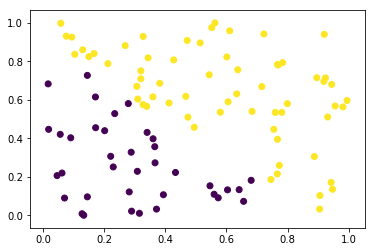

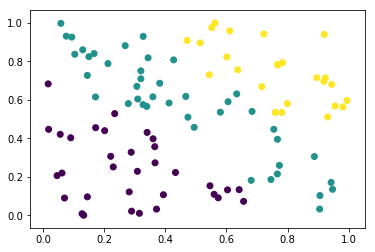

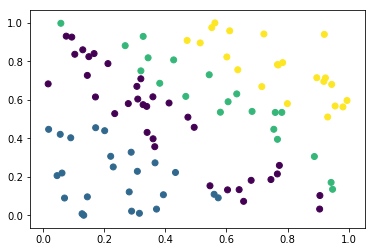

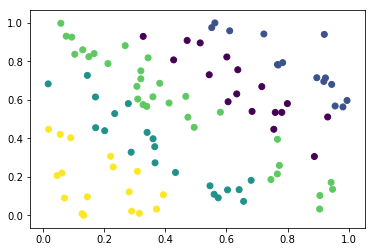

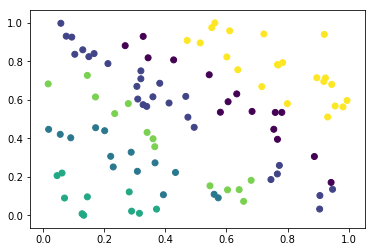

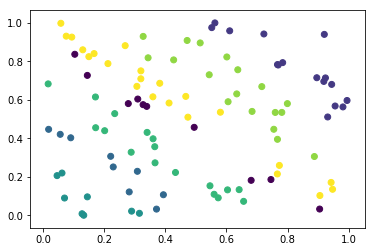

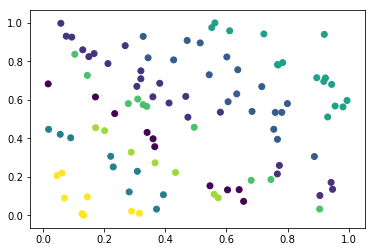

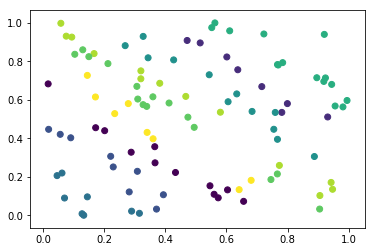

In [8]:
i = [KMeans(points,k) for k in range(2,10)]

In [9]:
i

[30.061722314136983,
 27.126034275108172,
 26.131577812246345,
 25.218134648960451,
 24.787964823902925,
 24.516041612536288,
 24.413240664071925,
 24.242767068929048]

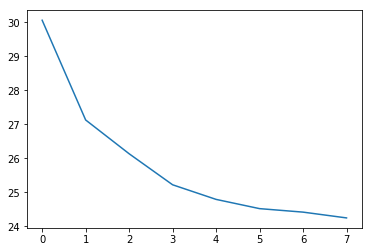

In [10]:
plt.plot(range(8),i)
plt.show()